## Apply all imports here

In [52]:
from os import listdir, getcwd
import os
from os.path import isfile, join
import subprocess
import sys
import csv
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import ast
import re
import json
import statistics



## Read all csv files 

In [53]:
mypath_soot = join(getcwd(), 'eval_results/soot_res')
mypath_sootup = join(getcwd(), 'eval_results/sootup_res')
# print(mypath)

csv_files_soot = [f for f in listdir(mypath_soot) if isfile(join(mypath_soot, f))]
csv_files_sootup = [f for f in listdir(mypath_sootup) if isfile(join(mypath_sootup, f))]
print(csv_files_soot)
print(csv_files_sootup)

csv_files_soot = ['soot_ide_eval_vm_merged.csv']
csv_files_sootup = ['sootUp_ide_eval_mix_vm_1.csv']

completepaths_soot = [os.path.join(mypath_soot, f) for f in csv_files_soot]
completepaths_sootup = [os.path.join(mypath_sootup, f) for f in csv_files_sootup]
# print(completepaths)

desired_col_soot = ["jar","solver","thread","totalRuntime","cgConstructionTime","prop","method","mem","CallGraphAlgo","callGraphEdges","callGraphReachableNodes","initialStmtCount","stmtCountAfterApplyingBI","BodyTransformers","BodyTransformersMetrics"]
desired_col_sootup = ["jar","solver","thread","totalRuntime","cgConstructionTime","prop","method","mem","CallGraphAlgo","callGraphEdges","callGraphReachableNodes","initialStmtCount","stmtCountAfterApplyingBI","BodyInterceptors","BodyInterceptorsMetrics"]

for completefilepath_soot in completepaths_soot:
    df_soot = pd.read_csv(completefilepath_soot, sep=";")

for completefilepath_sootup in completepaths_sootup:
    df_sootup = pd.read_csv(completefilepath_sootup, sep=";")

df_soot.columns = desired_col_soot
df_sootup.columns = desired_col_sootup


def apply_complex_function1(x):
    return list(map(str.strip, x['BodyTransformers'].strip('[]').split(',')))

def apply_complex_function2(x):
    return list(map(str.strip, x['BodyInterceptors'].strip('[]').split(',')))

def convert_to_dict1(metric_str):
    # Replace '=' with ':' and add double quotes around the keys
    metric_str['BodyTransformersMetrics'] = re.sub(r'([\w\.]+)=', r'"\1":', metric_str['BodyTransformersMetrics'])
    metric_str['BodyTransformersMetrics'] = metric_str['BodyTransformersMetrics'].replace('=', ':').replace('[', '[').replace(']', ']')
    return json.loads(metric_str['BodyTransformersMetrics'].replace("'", '"'))

def convert_to_dict2(metric_str):
    # Replace '=' with ':' and add double quotes around the keys
    metric_str['BodyInterceptorsMetrics'] = re.sub(r'@[\w]+', '', metric_str['BodyInterceptorsMetrics'])
    metric_str['BodyInterceptorsMetrics'] = re.sub(r'([\w\.]+)=', r'"\1":', metric_str['BodyInterceptorsMetrics'])
    metric_str['BodyInterceptorsMetrics'] = metric_str['BodyInterceptorsMetrics'].replace('=', ':').replace('[', '[').replace(']', ']')
    return json.loads(metric_str['BodyInterceptorsMetrics'].replace("'", '"'))

key_mapping = {
    'sootup.interceptors.TypeAssigner': 'jb.tr',
    'sootup.interceptors.DeadAssignmentEliminator': 'jb.dae',
    'sootup.interceptors.UnusedLocalEliminator': 'jb.ule',
    'sootup.interceptors.LocalSplitter': 'jb.ls',
    'sootup.interceptors.LocalPacker': 'jb.lp',
    'sootup.interceptors.CopyPropagator': 'jb.cp',
    'sootup.interceptors.Aggregator': 'jb.a',
    'sootup.interceptors.EmptySwitchEliminator': 'jb.ese',
    'sootup.interceptors.ConditionalBranchFolder': 'jb.cbf'
}

def replace_keys_in_dict(original_dict):
    new_dict = {}
    for old_key, value in original_dict['BodyInterceptorsMetrics'].items():
        # Use the mapping to replace the key if it exists in the mapping
        new_key = key_mapping.get(old_key, old_key)  # If not in mapping, keep original key
        new_dict[new_key] = value
    return new_dict
    
df_soot['BodyTransformers'] = df_soot.apply(apply_complex_function1, axis=1)
df_sootup['BodyInterceptors'] = df_sootup.apply(apply_complex_function2, axis=1)
df_soot['BodyTransformersMetrics'] = df_soot.apply(convert_to_dict1, axis=1)
df_sootup['BodyInterceptorsMetrics'] = df_sootup.apply(convert_to_dict2, axis=1)
df_sootup['BodyInterceptorsMetrics'] = df_sootup.apply(replace_keys_in_dict, axis=1)


# df_soot['BodyTransformers'][1]
# df_soot['BodyTransformersMetrics'][1].keys()
# df_sootup['BodyInterceptors'][1]
# df_sootup['BodyInterceptorsMetrics'][1].keys()


['soot_ide_eval_CHA_20_run1.csv', 'soot_ide_eval_CHA_20_run2_hp.csv', 'soot_ide_eval_mix_run3_hp.csv', 'soot_ide_eval_RTA_17_run1.csv', 'soot_ide_eval_RTA_17_run2.csv', 'soot_ide_eval_vm_cha_1.csv', 'soot_ide_eval_vm_merged.csv', 'soot_ide_eval_vm_mix_1.csv', 'soot_ide_eval_vm_mix_2.csv', 'soot_ide_eval_vm_rta_1.csv']
['sootUp_ide_eval_CHA_13_run1.csv', 'sootUp_ide_eval_mix_vm_1.csv', 'sootUp_ide_eval_RTA_13_run1.csv']


In [3]:
df_soot.iloc[0:1]

,jar,solver,thread,totalRuntime,cgConstructionTime,prop,method,mem,CallGraphAlgo,callGraphEdges,callGraphReachableNodes,initialStmtCount,stmtCountAfterApplyingBI,BodyTransformers,BodyTransformersMetrics
0,slf4j-reload4j-2.0.7,default,1,3669,716,0,0,54,CHA,283,188,938,355,"[JB_LS, JB_TR, JB_LP, JB_ULE, JB_CP, JB_ESE, J...","{'jb.cp': [135, 0], 'jb.ule': [4, 0], 'jb.tr':..."


In [5]:
df_sootup.iloc[0:1]

,jar,solver,thread,totalRuntime,cgConstructionTime,prop,method,mem,CallGraphAlgo,callGraphEdges,callGraphReachableNodes,initialStmtCount,stmtCountAfterApplyingBI,BodyInterceptors,BodyInterceptorsMetrics
0,slf4j-reload4j-2.0.7,default,1,689,131,0,50,34,CHA,101,93,295,316,"[JB_LS, JB_TR, JB_LP, JB_ULE, JB_CP, JB_ESE, J...","{'jb.tr': [239, 2], 'jb.lp': [100, 0], 'jb.ese..."


In [5]:
df.groupby('jar')['jar'].count()

jar
commons-codec-1.15            720
commons-io-2.11.0             720
commons-lang3-3.12.0          720
commons-logging-1.2           720
gson-2.10.1                   720
jackson-annotations-2.14.2    720
jackson-core-2.14.2           730
jakarta.servlet-api-6.0.0     720
jcl-over-slf4j-2.0.7          720
joda-time-2.12.5              720
jsr305-3.0.2                  720
junit-jupiter-api-5.9.2       720
junit-jupiter-engine-5.9.2    720
slf4j-api-2.0.7               720
slf4j-reload4j-2.0.7          720
slf4j-simple-2.0.7            720
testng-7.7.1                  667
Name: jar, dtype: int64

## Convert csv with , files

In [2]:
# import re
# import json
# import pandas as pd
# import csv
# import ast

# mypath = join(getcwd(), 'eval_results/soot_res')
# # print(mypath)

# csv_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# # print(csv_files)
# # csv_files = ['soot_ide_eval_CHA_20_run1.csv','soot_ide_eval_CHA_20_run2_hp.csv', 'soot_ide_eval_RTA_17_run1.csv', 'soot_ide_eval_RTA_17_run2.csv']
# csv_files = ['soot_ide_eval_CHA_20_run1.csv','soot_ide_eval_CHA_20_run2_hp.csv']

# completepaths = [os.path.join(mypath, f) for f in csv_files]
# # print(completepaths)

# for completepath in completepaths:
#     with open(completepath, 'r', encoding='UTF-8') as file:
#         lines = [line.rstrip() for line in file]

# print(lines[1])

# # input_str = """
# # jar,solver,thread,totalRuntime,cgConstructionTime,prop,method,mem,CallGraphAlgo,callGraphEdges,callGraphReachableNodes,initialStmtCount,stmtCountAfterApplyingBI,BodyTransformers,BodyTransformersMetrics
# # assertj-core-3.24.2,default,1,88422,5368,3974427,50,554,CHA,57910,13599,101912,102790,[JB_LS, JB_TR],{jb.tr=[1470, -366], jb.ls=[903, -50]}
# # assertj-core-3.24.2,default,1,62110,6085,3020975,50,594,CHA,57910,13599,101912,102790,[JB_LS, JB_TR, JB_LP],{jb.tr=[1424, 2], jb.lp=[697, -126], jb.ls=[731, -476]}
# # """
# input_str = '\n'.join(lines)
# # print(input_str)

# new_ouput = ""
# new_different_output = ""
# for each_row in input_str.split('\n'): 
#     # print(each_row)
#     if each_row.strip() != "":
#         split_row = each_row.split(',')
#         new_ouput += ','.join(split_row[:13])
#         new_ouput += '\n'
#         new_different_output += ','.join(split_row[13:])
#         new_different_output += '\n'

# # with open('simple_output.csv', 'w') as file:
# #     file.write(new_ouput)

# # df = pd.read_csv('simple_output.csv')
# # # print(df.head())

# TESTDATA = StringIO(new_ouput)
# df = pd.read_csv(TESTDATA, sep=",")

# pattern = r'^(\[.*?\]),(\{.*\})$'

# each_index = 0
# for each_row in new_different_output.split('\n'):
#     if each_row.strip() != "" and not each_row.startswith('BodyTransformers'):
#         match = re.match(pattern, each_row)
#         if match:
#             BodyTransformers_str = match.group(1)
#             column_y = BodyTransformers_str.strip('[]').split(',')
#             # print(each_index)
#             df.loc[each_index, 'BodyTransformers'] = json.dumps(column_y)
#             column_z_str = match.group(2).replace('=', ':')
#             # column_z_str = re.sub(r'([\w\.]+):', r'"\1":', column_z_str)
#             column_z_str = re.sub(r'([a-zA-Z0-9._-]+):', r'"\1":', column_z_str)
#             # string_literal = repr(column_z_str)
#             # print(column_z_str)
#             column_z = json.loads(column_z_str)
#             df.loc[each_index, 'BodyTransformersMetrics'] = json.dumps(column_z)
#         each_index += 1

# # print(df.head())

# df_CHA = df[df['CallGraphAlgo'] == 'CHA']
# df_RTA = df[df['CallGraphAlgo'] == 'RTA']
# print(f"df CHA rows: {len(df_CHA.index)} columns: {len(df_CHA.columns)}")
# print(f"df RTA rows: {len(df_RTA.index)} columns: {len(df_RTA.columns)}")

assertj-core-3.24.2,default,1,157630,11489,3946320,50,473,CHA,57918,13601,101910,102790,[JB_LS, JB_TR],{jb.tr=[3019, -223], jb.ls=[1855, -48]}
df CHA rows: 961 columns: 15
df RTA rows: 0 columns: 15


In [ ]:
for key, value in df_CHA['BodyTransformersMetrics'].items():
    None
    # print(value)

df_CHA.head(1)
df_CHA.describe

# ===================== RQ2 ==========================

# IF YOU JUST WANT TO COMPARE INDIVIDUAL BODY INTERCEPTOR THEN RUN EACH JAR WITH JUST INDIVIDUAL INTERCEPTOR

### Average of all jars Runtime

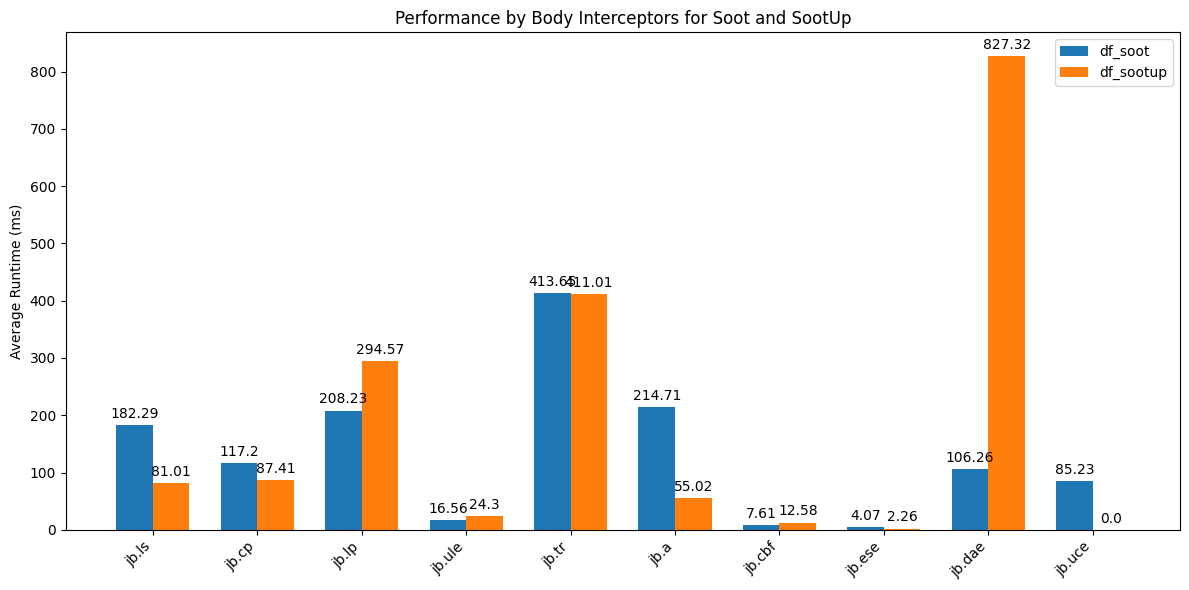

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
df_soot = pd.DataFrame({
    'jar': df_soot['jar'],
    'BodyTransformers': df_soot['BodyTransformers'],
    'BodyTransformersMetrics': df_soot['BodyTransformersMetrics']
})

df_sootup = pd.DataFrame({
    'jar': df_sootup['jar'],
    'BodyInterceptors': df_sootup['BodyInterceptors'],
    'BodyInterceptorsMetrics': df_sootup['BodyInterceptorsMetrics']
})

# Extract the transformers and their performance metrics, skipping those with list size == 1
def extract_metrics1(df):
    metrics_soot_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyTransformersMetrics']) > 1:
            for transformer, values in row['BodyTransformersMetrics'].items():
                if transformer in metrics_soot_temp:
                    metrics_soot_temp[transformer].append(values[0])
                else:
                    metrics_soot_temp[transformer] = [values[0]]  # Assuming we take the first value as the performance metric
    return metrics_soot_temp

def extract_metrics2(df):
    metrics_sootup_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyInterceptorsMetrics']) > 1:
            for transformer, values in row['BodyInterceptorsMetrics'].items():
                # Appending each value as a list & later average it
                if transformer in metrics_sootup_temp:
                    metrics_sootup_temp[transformer].append(values[0])
                else:
                    metrics_sootup_temp[transformer] = [values[0]]  # Assuming we take the first value as the performance metric
    return metrics_sootup_temp

metrics_soot = extract_metrics1(df_soot)
metrics_sootup = extract_metrics2(df_sootup)

# Align the transformers for comparison
all_transformers = set(metrics_soot.keys()).union(set(metrics_sootup.keys()))
# print(all_transformers)

# Create lists for the metrics for each dataframe
# soot_values = [metrics_soot.get(transformer, 0) for transformer in all_transformers]
# sootup_values = [metrics_sootup.get(transformer, 0) for transformer in all_transformers]
soot_values = [round(statistics.fmean(metrics_soot.get(transformer)), 2) for transformer in all_transformers]
# for some reason list has None values (maybe in sootup we don't have uce values we call it with cbf)
sootup_values = [
    round(statistics.fmean([val for val in metrics_sootup.get(transformer, [0]) if val is not None]) , 2)
    for transformer in all_transformers
]

# Plotting side-by-side bar charts
x = np.arange(len(all_transformers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, soot_values, width, label='df_soot')
rects2 = ax.bar(x + width/2, sootup_values, width, label='df_sootup')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Average Runtime (ms)')
ax.set_title('Performance by Body Interceptors for Soot and SootUp')
ax.set_xticks(x)
ax.set_xticklabels(all_transformers, rotation=45, ha='right')
ax.legend()

# Function to label the bars with their heights
def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### Average of all jars absolute Memory

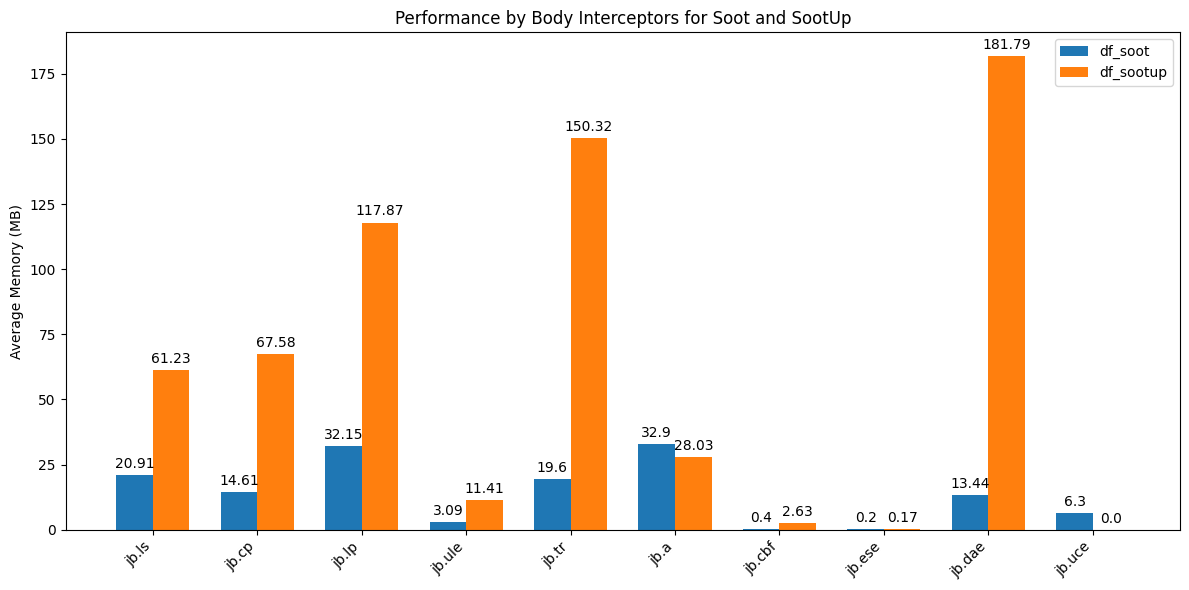

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
df_soot = pd.DataFrame({
    'jar': df_soot['jar'],
    'BodyTransformers': df_soot['BodyTransformers'],
    'BodyTransformersMetrics': df_soot['BodyTransformersMetrics']
})

df_sootup = pd.DataFrame({
    'jar': df_sootup['jar'],
    'BodyInterceptors': df_sootup['BodyInterceptors'],
    'BodyInterceptorsMetrics': df_sootup['BodyInterceptorsMetrics']
})

# Extract the transformers and their performance metrics, skipping those with list size == 1
def extract_metrics1(df):
    metrics_soot_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyTransformersMetrics']) > 1:
            for transformer, values in row['BodyTransformersMetrics'].items():
                if transformer in metrics_soot_temp:
                    metrics_soot_temp[transformer].append(abs(values[1]))
                else:
                    metrics_soot_temp[transformer] = [abs(values[1])]  # Assuming we take the first value as the memory metric
    return metrics_soot_temp

def extract_metrics2(df):
    metrics_sootup_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyInterceptorsMetrics']) > 1:
            for transformer, values in row['BodyInterceptorsMetrics'].items():
                # Appending each value as a list & later average it
                if transformer in metrics_sootup_temp:
                    metrics_sootup_temp[transformer].append(abs(values[1]))
                else:
                    metrics_sootup_temp[transformer] = [abs(values[1])]  # Assuming we take the first value as the memory metric
    return metrics_sootup_temp

metrics_soot = extract_metrics1(df_soot)
metrics_sootup = extract_metrics2(df_sootup)

# Align the transformers for comparison
all_transformers = set(metrics_soot.keys()).union(set(metrics_sootup.keys()))
# print(all_transformers)

# Create lists for the metrics for each dataframe
# soot_values = [metrics_soot.get(transformer, 0) for transformer in all_transformers]
# sootup_values = [metrics_sootup.get(transformer, 0) for transformer in all_transformers]
soot_values = [round(statistics.fmean(metrics_soot.get(transformer)), 2) for transformer in all_transformers]
# for some reason list has None values (maybe in sootup we don't have uce values we call it with cbf)
sootup_values = [
    round(statistics.fmean([val for val in metrics_sootup.get(transformer, [0]) if val is not None]) , 2)
    for transformer in all_transformers
]

# Plotting side-by-side bar charts
x = np.arange(len(all_transformers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, soot_values, width, label='df_soot')
rects2 = ax.bar(x + width/2, sootup_values, width, label='df_sootup')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Average Memory (MB)')
ax.set_title('Performance by Body Interceptors for Soot and SootUp')
ax.set_xticks(x)
ax.set_xticklabels(all_transformers, rotation=45, ha='right')
ax.legend()

# Function to label the bars with their heights
def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [41]:
df_soot['BodyTransformers'][1]
print(df_soot['BodyTransformersMetrics'][1].items())

['JB_LS', 'JB_TR', 'JB_LP', 'JB_ULE', 'JB_CP', 'JB_ESE', 'JB_A']

### Individual Jar Runtime

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory to save the plots
output_directory = r'C:\Users\sahil\Documents\master-thesis\thesis_fig\RQ2\individual_jar_runtime'
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Sample Data
df_soot = pd.DataFrame({
    'jar': df_soot['jar'],
    'BodyTransformers': df_soot['BodyTransformers'],
    'BodyTransformersMetrics': df_soot['BodyTransformersMetrics']
})

df_sootup = pd.DataFrame({
    'jar': df_sootup['jar'],
    'BodyInterceptors': df_sootup['BodyInterceptors'],
    'BodyInterceptorsMetrics': df_sootup['BodyInterceptorsMetrics']
})

# Extract the transformers and their performance metrics, skipping those with list size == 1
def extract_metrics1(df):
    metrics_soot_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyTransformersMetrics']) > 1:
            for transformer, values in row['BodyTransformersMetrics'].items():
                if transformer in metrics_soot_temp:
                    metrics_soot_temp[transformer].append(values[0])
                else:
                    metrics_soot_temp[transformer] = [values[0]]  # Taking the first value as the performance metric
    return metrics_soot_temp

def extract_metrics2(df):
    metrics_sootup_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyInterceptorsMetrics']) > 1:
            for transformer, values in row['BodyInterceptorsMetrics'].items():
                if transformer in metrics_sootup_temp:
                    metrics_sootup_temp[transformer].append(values[0])
                else:
                    metrics_sootup_temp[transformer] = [values[0]]  # Taking the first value as the performance metric
    return metrics_sootup_temp

# Loop through each unique jar
for jar in df_soot['jar'].unique():
    # Filter the data for the current jar
    df_soot_jar = df_soot[df_soot['jar'] == jar]
    df_sootup_jar = df_sootup[df_sootup['jar'] == jar]
    
    # Extract metrics for the jar-specific data
    metrics_soot = extract_metrics1(df_soot_jar)
    metrics_sootup = extract_metrics2(df_sootup_jar)

    # Align the transformers for comparison
    all_transformers = set(metrics_soot.keys()).union(set(metrics_sootup.keys()))
    
    # Create lists for the metrics for each dataframe
    soot_values = [round(statistics.fmean(metrics_soot.get(transformer, [0])), 2) for transformer in all_transformers]
    sootup_values = [
        round(statistics.fmean([val for val in metrics_sootup.get(transformer, [0]) if val is not None]), 2)
        for transformer in all_transformers
    ]

    # Plotting side-by-side bar charts for the specific jar
    x = np.arange(len(all_transformers))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, soot_values, width, label='df_soot')
    rects2 = ax.bar(x + width/2, sootup_values, width, label='df_sootup')

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Average Runtime (ms)')
    ax.set_title(f'Performance by Body Interceptors for Soot and SootUp - {jar}')
    ax.set_xticks(x)
    ax.set_xticklabels(all_transformers, rotation=45, ha='right')
    ax.legend()

    # Function to label the bars with their heights
    def autolabel(rects):
        """Attach a text label above each bar in rects, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Adjust layout and show the plot
    fig.tight_layout()
    # plt.show()
    # Save the plot
    plot_filename = os.path.join(output_directory, f'{jar}_performance_comparison.png')
    plt.savefig(plot_filename)
    # Clear the figure to avoid overlapping of plots in the next iteration
    plt.close(fig)


### Individual Jar Memory

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory to save the plots
output_directory = r'C:\Users\sahil\Documents\master-thesis\thesis_fig\RQ2\individual_jar_mem'
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist


# Sample Data
df_soot = pd.DataFrame({
    'jar': df_soot['jar'],
    'BodyTransformers': df_soot['BodyTransformers'],
    'BodyTransformersMetrics': df_soot['BodyTransformersMetrics']
})

df_sootup = pd.DataFrame({
    'jar': df_sootup['jar'],
    'BodyInterceptors': df_sootup['BodyInterceptors'],
    'BodyInterceptorsMetrics': df_sootup['BodyInterceptorsMetrics']
})

# Extract the transformers and their performance metrics, skipping those with list size == 1
def extract_metrics1(df):
    metrics_soot_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyTransformersMetrics']) > 1:
            for transformer, values in row['BodyTransformersMetrics'].items():
                if transformer in metrics_soot_temp:
                    metrics_soot_temp[transformer].append(abs(values[1]))
                else:
                    metrics_soot_temp[transformer] = [abs(values[1])]  # Taking the first value as the performance metric
    return metrics_soot_temp

def extract_metrics2(df):
    metrics_sootup_temp = {}
    for idx, row in df.iterrows():
        if len(row['BodyInterceptorsMetrics']) > 1:
            for transformer, values in row['BodyInterceptorsMetrics'].items():
                if transformer in metrics_sootup_temp:
                    metrics_sootup_temp[transformer].append(abs(values[1]))
                else:
                    metrics_sootup_temp[transformer] = [abs(values[1])]  # Taking the first value as the performance metric
    return metrics_sootup_temp

# Loop through each unique jar
for jar in df_soot['jar'].unique():
    # Filter the data for the current jar
    df_soot_jar = df_soot[df_soot['jar'] == jar]
    df_sootup_jar = df_sootup[df_sootup['jar'] == jar]
    
    # Extract metrics for the jar-specific data
    metrics_soot = extract_metrics1(df_soot_jar)
    metrics_sootup = extract_metrics2(df_sootup_jar)

    # Align the transformers for comparison
    all_transformers = set(metrics_soot.keys()).union(set(metrics_sootup.keys()))
    
    # Create lists for the metrics for each dataframe
    soot_values = [round(statistics.fmean(metrics_soot.get(transformer, [0])), 2) for transformer in all_transformers]
    sootup_values = [
        round(statistics.fmean([val for val in metrics_sootup.get(transformer, [0]) if val is not None]), 2)
        for transformer in all_transformers
    ]

    # Plotting side-by-side bar charts for the specific jar
    x = np.arange(len(all_transformers))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, soot_values, width, label='df_soot')
    rects2 = ax.bar(x + width/2, sootup_values, width, label='df_sootup')

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Average Memory (MB)')
    ax.set_title(f'Performance by Body Interceptors for Soot and SootUp - {jar}')
    ax.set_xticks(x)
    ax.set_xticklabels(all_transformers, rotation=45, ha='right')
    ax.legend()

    # Function to label the bars with their heights
    def autolabel(rects):
        """Attach a text label above each bar in rects, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Adjust layout and show the plot
    fig.tight_layout()
    # plt.show()
    # Save the plot
    plot_filename = os.path.join(output_directory, f'{jar}_performance_comparison.png')
    plt.savefig(plot_filename)
    # Clear the figure to avoid overlapping of plots in the next iteration
    plt.close(fig)


# ===================== RQ3 ==========================

## CHA and RTA

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


df_soot_analysis = pd.DataFrame({
    'jar': df_soot['jar'],
    'cgConstructionTime': df_soot['cgConstructionTime'],
    'CallGraphAlgo': df_soot['CallGraphAlgo'],
    'callGraphEdges': df_soot['callGraphEdges'],
    'callGraphReachableNodes': df_soot['callGraphReachableNodes'],
    'stmtDiff': df_soot['stmtCountAfterApplyingBI'] - df_soot['initialStmtCount'],
    'BodyTransformersMetrics': df_soot['BodyTransformersMetrics']
})

df_sootup_analysis = pd.DataFrame({
    'jar': df_sootup['jar'],
    'cgConstructionTime': df_sootup['cgConstructionTime'],
    'CallGraphAlgo': df_sootup['CallGraphAlgo'],
    'callGraphEdges': df_sootup['callGraphEdges'],
    'callGraphReachableNodes': df_sootup['callGraphReachableNodes'],
    'stmtDiff': df_sootup['stmtCountAfterApplyingBI'] - df_sootup['initialStmtCount'],
    'BodyInterceptorsMetrics': df_sootup['BodyInterceptorsMetrics']
})

# Correlation Analysis: We calculate the correlation between each transformer's values and the cgConstructionTime. 
                      # A higher positive or negative correlation indicates a stronger impact on the construction time.
# Correlation Matrix: This shows how strongly each transformer’s metrics correlate with cgConstructionTime. 
                    # A high positive or negative correlation suggests the transformer has a significant impact.
# Purpose: Measures the strength and direction of a linear relationship between two variables. 
# Key Point: Correlation only tells you if and how strongly two variables move together, but it doesn’t imply causality (i.e., it doesn’t show if one variable causes the other to change).
# In the context of your problem, correlation analysis gives an idea of how the individual body transformers (like jb.cp, jb.ls) are linearly related to cgConstructionTime. However, correlation doesn't account for the impact of multiple transformers at the same time.
# A positive correlation means that as the value of the transformer increases, the construction time tends to increase, and vice versa for negative correlation.


# Regression Analysis: We fit a linear regression model to quantify the relationship between each transformer and the cgConstructionTime. 
                    # The coefficients of the regression model give insights into how much each transformer affects the construction time.

# Linear Regression Coefficients: This shows how much each transformer’s metrics influence the cgConstructionTime. 
                                # Positive coefficients indicate that an increase in the transformer’s metric increases the construction time, 
                                # while negative coefficients indicate a decrease.

# Purpose: Explores the relationship between one dependent variable (e.g., cgConstructionTime) and one or more independent variables (e.g., the body transformers). In linear regression, the goal is to predict the value of the dependent variable based on the independent variables.
# Output: Regression gives coefficients for each independent variable. These coefficients tell you how much the dependent variable changes when the independent variable changes by 1 unit, holding all other variables constant.
# Key Point: Regression not only measures the strength and direction of the relationship but also quantifies the effect of each variable on the dependent variable. It's also useful for predicting outcomes.
# This gives you insight into which transformers have the most significant impact.



### Soot Correlation Matrix & LinearRegression between each body transformer & cgConstructionTime (CHA)

Correlation matrix between transformers and cgConstructionTime:
cgConstructionTime    1.000000
jb.tr                 0.955838
jb.lp                 0.908841
jb.a                  0.848400
jb.ls                 0.834792
jb.ule                0.627244
jb.cp                 0.447525
jb.ese                0.427919
jb.dae                0.320884
jb.uce                0.264766
jb.cbf                0.124175
Name: cgConstructionTime, dtype: float64


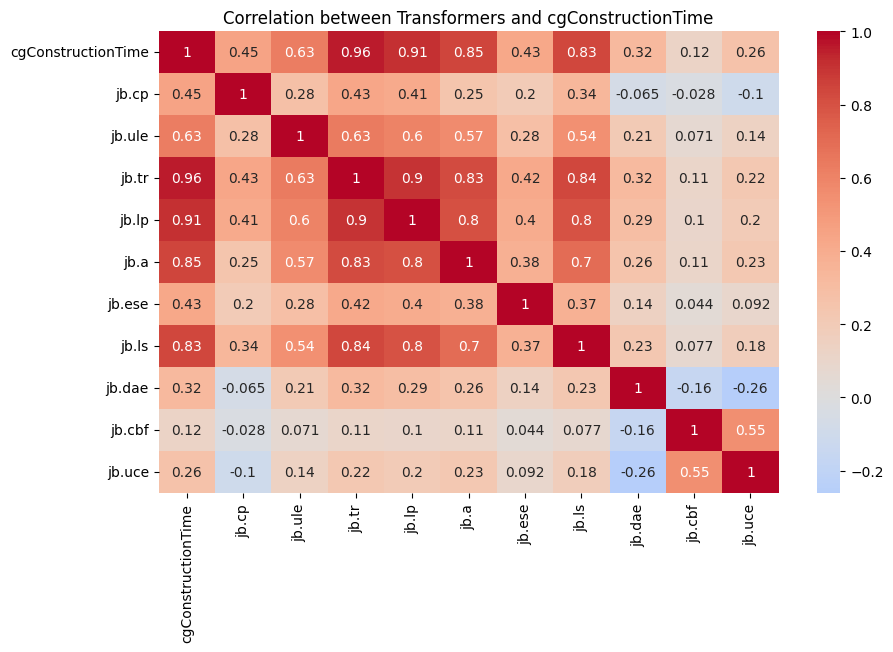


Linear regression coefficients:
jb.ese    3.193128
jb.tr     1.840278
jb.uce    1.704698
jb.cp     1.499400
jb.a      1.396899
jb.lp     1.309111
jb.dae    1.269387
jb.ls     1.116094
jb.ule    0.908200
jb.cbf   -2.278709
dtype: float64


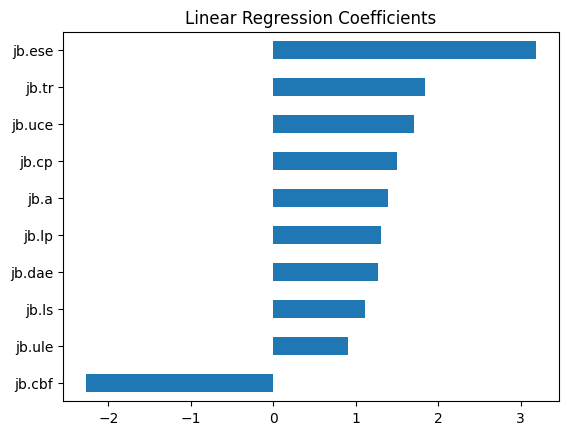

In [56]:
df = pd.DataFrame(df_soot_analysis)

# Filter for CallGraphAlgo = 'CHA'
df_cha = df[df['CallGraphAlgo'] == 'CHA']

# Create a list to store the extracted metrics
metrics_list = []

# Loop through the DataFrame and extract transformer metrics
for idx, row in df_cha.iterrows():
    # Initialize a dictionary to hold the metrics for this row
    row_metrics = {'cgConstructionTime': row['cgConstructionTime']}
    
    # Iterate through each transformer and extract the first value (assuming it's the impact)
    for transformer, values in row['BodyTransformersMetrics'].items():
        # Add the first value (assumed to be the metric we're interested in) to the row
        row_metrics[transformer] = values[0]
    
    # Append the dictionary to the list
    metrics_list.append(row_metrics)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Fill NaN with 0 (if any transformers are missing in some rows)
metrics_df.fillna(0, inplace=True)

# Perform a correlation analysis
correlation_matrix = metrics_df.corr()

# Display the correlation matrix
print("Correlation matrix between transformers and cgConstructionTime:")
print(correlation_matrix['cgConstructionTime'].sort_values(ascending=False))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Transformers and cgConstructionTime')
plt.show()

# Alternatively, you can perform a linear regression to see the impact of transformers on cgConstructionTime
X = metrics_df.drop(columns=['cgConstructionTime'])
y = metrics_df['cgConstructionTime']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients for each transformer
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nLinear regression coefficients:")
print(coefficients.sort_values(ascending=False))

# Plot the coefficients
coefficients.sort_values(ascending=True).plot(kind='barh', title='Linear Regression Coefficients')
plt.show()

### SootUp Correlation Matrix & LinearRegression between each body interceptor & cgConstructionTime (CHA)

Correlation matrix between transformers and cgConstructionTime:
cgConstructionTime    1.000000
jb.tr                 0.755727
jb.a                  0.732687
jb.ule                0.665712
jb.ls                 0.660031
jb.lp                 0.594269
jb.ese                0.311125
jb.cp                 0.293637
jb.cbf                0.136783
jb.dae                0.043362
Name: cgConstructionTime, dtype: float64


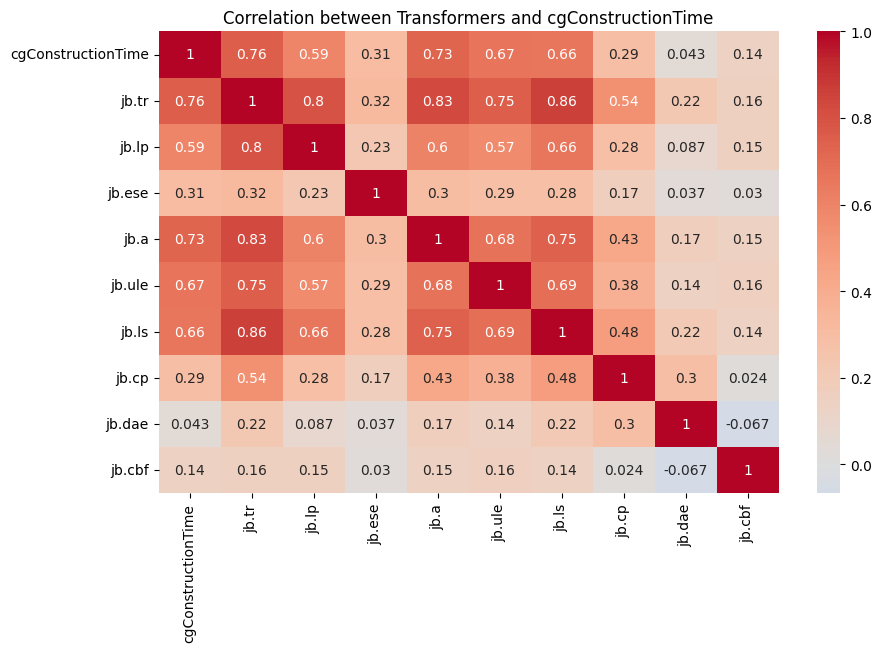


Linear regression coefficients:
jb.ese    2.598816
jb.ule    1.569750
jb.a      1.146232
jb.tr     0.292262
jb.dae   -0.016016
jb.lp    -0.020163
jb.ls    -0.062003
jb.cbf   -0.216807
jb.cp    -0.255507
dtype: float64


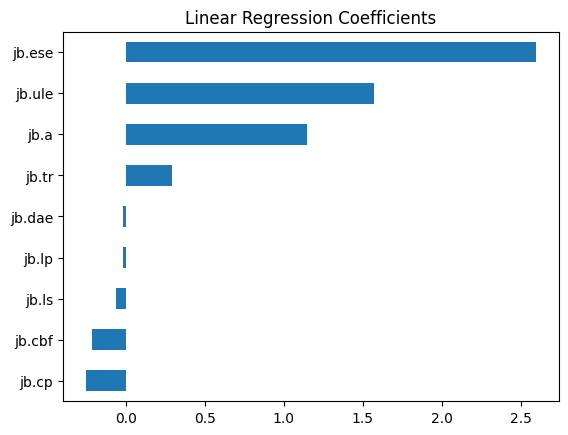

In [59]:
df = pd.DataFrame(df_sootup_analysis)

# Filter for CallGraphAlgo = 'CHA'
df_cha = df[df['CallGraphAlgo'] == 'CHA']

# Create a list to store the extracted metrics
metrics_list = []

# Loop through the DataFrame and extract transformer metrics
for idx, row in df_cha.iterrows():
    # Initialize a dictionary to hold the metrics for this row
    row_metrics = {'cgConstructionTime': row['cgConstructionTime']}
    
    # Iterate through each transformer and extract the first value (assuming it's the impact)
    for transformer, values in row['BodyInterceptorsMetrics'].items():
        # Add the first value (assumed to be the metric we're interested in) to the row
        row_metrics[transformer] = values[0]
    
    # Append the dictionary to the list
    metrics_list.append(row_metrics)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Fill NaN with 0 (if any transformers are missing in some rows)
metrics_df.fillna(0, inplace=True)

# Perform a correlation analysis
correlation_matrix = metrics_df.corr()

# Display the correlation matrix
print("Correlation matrix between transformers and cgConstructionTime:")
print(correlation_matrix['cgConstructionTime'].sort_values(ascending=False))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Transformers and cgConstructionTime')
plt.show()

# Alternatively, you can perform a linear regression to see the impact of transformers on cgConstructionTime
X = metrics_df.drop(columns=['cgConstructionTime'])
y = metrics_df['cgConstructionTime']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients for each transformer
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nLinear regression coefficients:")
print(coefficients.sort_values(ascending=False))

# Plot the coefficients
coefficients.sort_values(ascending=True).plot(kind='barh', title='Linear Regression Coefficients')
plt.show()

### Soot Correlation Matrix & LinearRegression between each body transformer & cgConstructionTime (RTA)

Correlation matrix between transformers and cgConstructionTime:
cgConstructionTime    1.000000
jb.tr                 0.675423
jb.lp                 0.565117
jb.a                  0.496615
jb.ls                 0.377777
jb.ule                0.359401
jb.uce                0.315668
jb.ese                0.245864
jb.cp                 0.231229
jb.dae                0.190348
jb.cbf                0.111892
Name: cgConstructionTime, dtype: float64


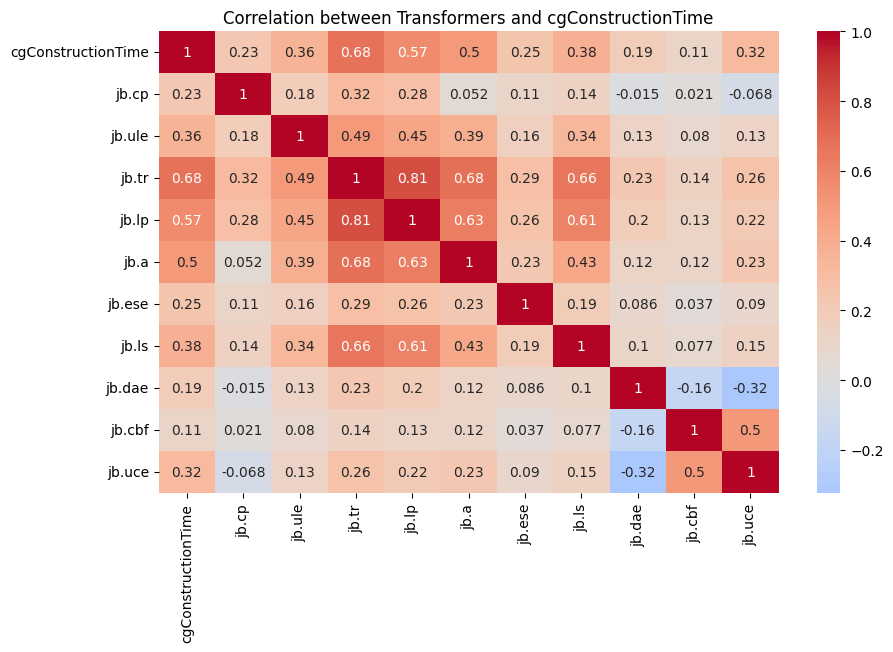


Linear regression coefficients:
jb.ese    14.001551
jb.uce     5.992548
jb.tr      4.739274
jb.ule     3.460059
jb.dae     3.240056
jb.cp      1.590613
jb.a       1.057541
jb.lp      0.820363
jb.ls     -2.022882
jb.cbf   -18.678070
dtype: float64


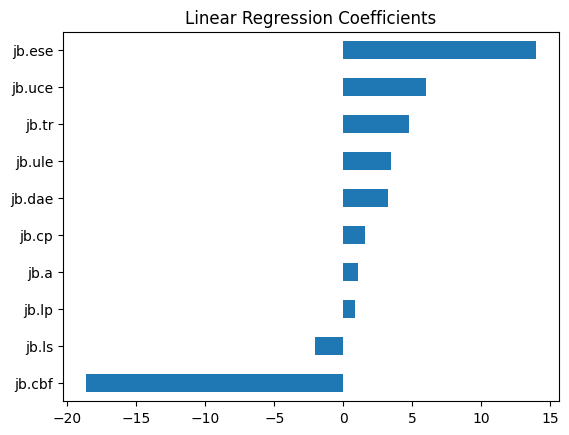

In [60]:
df = pd.DataFrame(df_soot_analysis)

# Filter for CallGraphAlgo = 'RTA'
df_cha = df[df['CallGraphAlgo'] == 'RTA']

# Create a list to store the extracted metrics
metrics_list = []

# Loop through the DataFrame and extract transformer metrics
for idx, row in df_cha.iterrows():
    # Initialize a dictionary to hold the metrics for this row
    row_metrics = {'cgConstructionTime': row['cgConstructionTime']}
    
    # Iterate through each transformer and extract the first value (assuming it's the impact)
    for transformer, values in row['BodyTransformersMetrics'].items():
        # Add the first value (assumed to be the metric we're interested in) to the row
        row_metrics[transformer] = values[0]
    
    # Append the dictionary to the list
    metrics_list.append(row_metrics)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Fill NaN with 0 (if any transformers are missing in some rows)
metrics_df.fillna(0, inplace=True)

# Perform a correlation analysis
correlation_matrix = metrics_df.corr()

# Display the correlation matrix
print("Correlation matrix between transformers and cgConstructionTime:")
print(correlation_matrix['cgConstructionTime'].sort_values(ascending=False))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Transformers and cgConstructionTime')
plt.show()

# Alternatively, you can perform a linear regression to see the impact of transformers on cgConstructionTime
X = metrics_df.drop(columns=['cgConstructionTime'])
y = metrics_df['cgConstructionTime']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients for each transformer
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nLinear regression coefficients:")
print(coefficients.sort_values(ascending=False))

# Plot the coefficients
coefficients.sort_values(ascending=True).plot(kind='barh', title='Linear Regression Coefficients')
plt.show()

### SootUp Correlation Matrix & LinearRegression between each body interceptor & cgConstructionTime (RTA)

Correlation matrix between transformers and cgConstructionTime:
cgConstructionTime    1.000000
jb.tr                 0.760122
jb.a                  0.748872
jb.ls                 0.672677
jb.ule                0.661673
jb.lp                 0.580695
jb.ese                0.360742
jb.cp                 0.293652
jb.cbf                0.134365
jb.dae                0.047423
Name: cgConstructionTime, dtype: float64


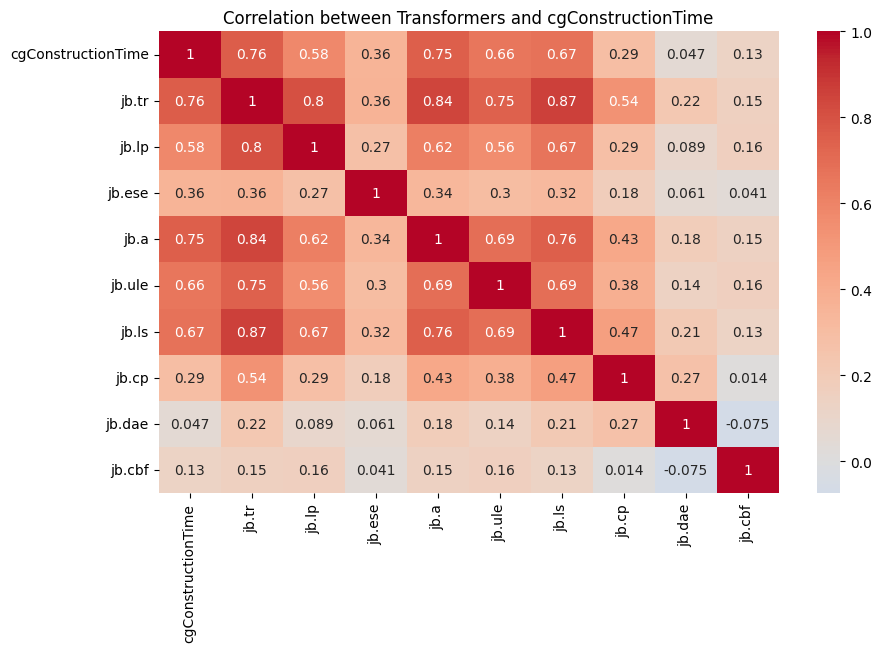


Linear regression coefficients:
jb.ese    4.043235
jb.ule    1.439502
jb.a      1.238860
jb.tr     0.334294
jb.ls    -0.003222
jb.dae   -0.018716
jb.lp    -0.053190
jb.cbf   -0.258265
jb.cp    -0.303455
dtype: float64


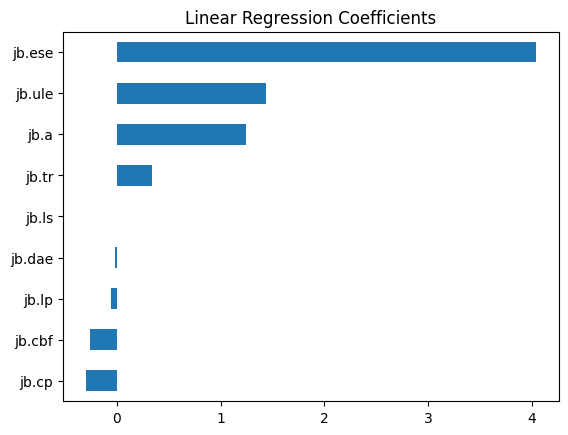

In [61]:
df = pd.DataFrame(df_sootup_analysis)

# Filter for CallGraphAlgo = 'RTA'
df_cha = df[df['CallGraphAlgo'] == 'RTA']

# Create a list to store the extracted metrics
metrics_list = []

# Loop through the DataFrame and extract transformer metrics
for idx, row in df_cha.iterrows():
    # Initialize a dictionary to hold the metrics for this row
    row_metrics = {'cgConstructionTime': row['cgConstructionTime']}
    
    # Iterate through each transformer and extract the first value (assuming it's the impact)
    for transformer, values in row['BodyInterceptorsMetrics'].items():
        # Add the first value (assumed to be the metric we're interested in) to the row
        row_metrics[transformer] = values[0]
    
    # Append the dictionary to the list
    metrics_list.append(row_metrics)

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Fill NaN with 0 (if any transformers are missing in some rows)
metrics_df.fillna(0, inplace=True)

# Perform a correlation analysis
correlation_matrix = metrics_df.corr()

# Display the correlation matrix
print("Correlation matrix between transformers and cgConstructionTime:")
print(correlation_matrix['cgConstructionTime'].sort_values(ascending=False))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Transformers and cgConstructionTime')
plt.show()

# Alternatively, you can perform a linear regression to see the impact of transformers on cgConstructionTime
X = metrics_df.drop(columns=['cgConstructionTime'])
y = metrics_df['cgConstructionTime']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients for each transformer
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nLinear regression coefficients:")
print(coefficients.sort_values(ascending=False))

# Plot the coefficients
coefficients.sort_values(ascending=True).plot(kind='barh', title='Linear Regression Coefficients')
plt.show()

## LCP

# ================== IGNORE ======================

### BodyTransfomers Combination VS totaltime for LCP (CHA)

In [ ]:
import pandas as pd

# Sample data
data = {
    'totalRuntime': df_CHA['totalRuntime'].values.tolist(),
    'BodyTransformers':  df_CHA['BodyTransformers'].values.tolist()
}

# Create a DataFrame
df_bi_lcp = pd.DataFrame(data)

# Explode the BodyTransformers list to create one row per transformer
df_exploded_bi_lcp = df_bi_lcp.explode('BodyTransformers')
print(df_exploded_bi_lcp)

# Group by BodyTransformer and calculate the mean totalRuntime for each transformer
transformer_runtime = df_exploded_bi_lcp.groupby('BodyTransformers')['totalRuntime'].mean()

# Display the result
print(transformer_runtime)

# Plot the results
plt.figure(figsize=(20, 10))
transformer_runtime.plot(kind='bar', color='skyblue')

plt.xticks(ticks=range(len(transformer_runtime)), labels=transformer_runtime.index, rotation=90)
plt.title('Average Total Runtime for Each BodyTransformer')
plt.xlabel('BodyTransformer')
plt.ylabel('Average Total Runtime')
plt.tight_layout()

# Show the plot
plt.show()


### BodyTransfomers Combination VS Stmt Count (CHA)

In [ ]:
df_CHA.head()
df1 = df_CHA[['initialStmtCount', 'stmtCountAfterApplyingBI', 'BodyTransformers']]
df1.iloc[90:120]
print('\n'.join(lines[:15]))

In [ ]:
df_CHA['stmtChange'] = df_CHA['initialStmtCount'] - df_CHA['stmtCountAfterApplyingBI']
df_CHA['stmtChange'] = df_CHA['stmtChange'].abs()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'stmtChange': df_CHA['stmtChange'].values.tolist(),
    'BodyTransformers':  df_CHA['BodyTransformers'].values.tolist()
}

# Create a DataFrame
df_bi_stmts = pd.DataFrame(data)

# Explode the BodyTransformers list to create one row per transformer
df_exploded_bi_stmts = df_bi_stmts.explode('BodyTransformers')
print(df_exploded_bi_stmts)

# Group by BodyTransformer and calculate the mean totalRuntime for each transformer
transformer_stmtChange = df_exploded_bi_stmts.groupby('BodyTransformers')['stmtChange'].mean()

# Display the result
print(transformer_stmtChange)

# Plot the results
plt.figure(figsize=(20, 10))
transformer_stmtChange.plot(kind='bar', color='skyblue')

plt.xticks(ticks=range(len(transformer_stmtChange)), labels=transformer_runtime.index, rotation=90)
plt.title('Average Statement Change for Each BodyTransformer')
plt.xlabel('BodyTransformer')
plt.ylabel('Average Statement Change')
plt.tight_layout()

# Show the plot
plt.show()


### Relationship between `Each BodyTransformer` and the `totalRuntime` using Correlation

In [6]:
# Import necessary libraries
import pandas as pd
import ast
 
# Sample data as provided
data = {
    'totalRuntime': df['totalRuntime'].values.tolist(),
    'BodyTransformersMetrics': df['BodyTransformersMetrics'].values.tolist()
}
 
# Create dataframe
df_1 = pd.DataFrame(data)
 
# Function to convert BodyTransformersMetrics string to a dictionary
def parse_body_transformers_metrics(metrics_str):
    return ast.literal_eval(metrics_str)
 
# Apply the function to parse the BodyTransformersMetrics column
df_1['BodyTransformersMetrics'] = df_1['BodyTransformersMetrics'].apply(parse_body_transformers_metrics)
 
# Extract individual BodyTransformers and their corresponding time taken
for index, row in df_1.iterrows():
    for transformer, metrics in row['BodyTransformersMetrics'].items():
        # Create a new column for each transformer and fill it with the time taken (first element of the list)
        df_1.at[index, transformer] = metrics[0]
 
# Drop the original 'BodyTransformersMetrics' column since it's no longer needed
df_1.drop(columns=['BodyTransformersMetrics'], inplace=True)
 
# Now let's analyze the relationship between each BodyTransformer and the totalRuntime
# Calculate the correlation matrix to find relationships between the columns
correlation_matrix = df_1.corr()
 
# Display the correlation matrix
correlation_matrix

,totalRuntime,jb.tr,jb.ls,jb.lp,jb.ese,jb.ne,jb.dae,jb.ule,jb.cp,jb.uce,jb.tt,jb.lns,jb.cbf,jb.dtr,jb.sils,jb.a,jb.ulp,jb.cp-ule
totalRuntime,1.000000,0.889877,0.863742,0.935439,0.895910,0.855858,0.958077,0.862117,0.933798,0.835201,0.917655,0.865239,0.879155,0.930109,0.967457,0.963944,0.932531,0.499258
jb.tr,0.889877,1.000000,0.979806,0.988822,0.906216,0.944131,0.990723,0.929102,0.996991,0.885695,0.958729,0.960542,0.948717,0.901748,0.987161,0.977293,0.982517,0.658513
jb.ls,0.863742,0.979806,1.000000,0.984793,0.928181,0.943335,0.982821,0.876573,0.991922,0.845287,0.968565,0.978366,0.954938,0.897047,0.987068,0.983104,0.991677,0.640039
jb.lp,0.935439,0.988822,0.984793,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.ese,0.895910,0.906216,0.928181,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.ne,0.855858,0.944131,0.943335,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.dae,0.958077,0.990723,0.982821,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.ule,0.862117,0.929102,0.876573,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.cp,0.933798,0.996991,0.991922,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jb.uce,0.835201,0.885695,0.845287,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_1.head

<bound method NDFrame.head of      totalRuntime   jb.tr   jb.ls   jb.lp  jb.ese  jb.ne  jb.dae  jb.ule  \
0          157630  3019.0  1855.0     NaN     NaN    NaN     NaN     NaN   
1           96568  2878.0  1520.0  1443.0     NaN    NaN     NaN     NaN   
2          138687  2947.0  1641.0     NaN    94.0    NaN     NaN     NaN   
3          137373  3880.0  2046.0     NaN     NaN  103.0     NaN     NaN   
4          131336  3015.0  1596.0     NaN     NaN    NaN  1080.0     NaN   
..            ...     ...     ...     ...     ...    ...     ...     ...   
956        139934  2128.0  1167.0     NaN     NaN    NaN     NaN     NaN   
957        132484  1949.0   836.0     NaN     NaN    NaN     NaN     NaN   
958        142220  2251.0   969.0     NaN     NaN    NaN     NaN     NaN   
959        124781  2109.0   944.0     NaN     NaN    NaN     NaN     NaN   
960        123916  1948.0  1102.0     NaN     NaN    NaN     NaN     NaN   

     jb.cp  jb.uce  jb.tt  jb.lns  jb.cbf  jb.dtr  jb.sil

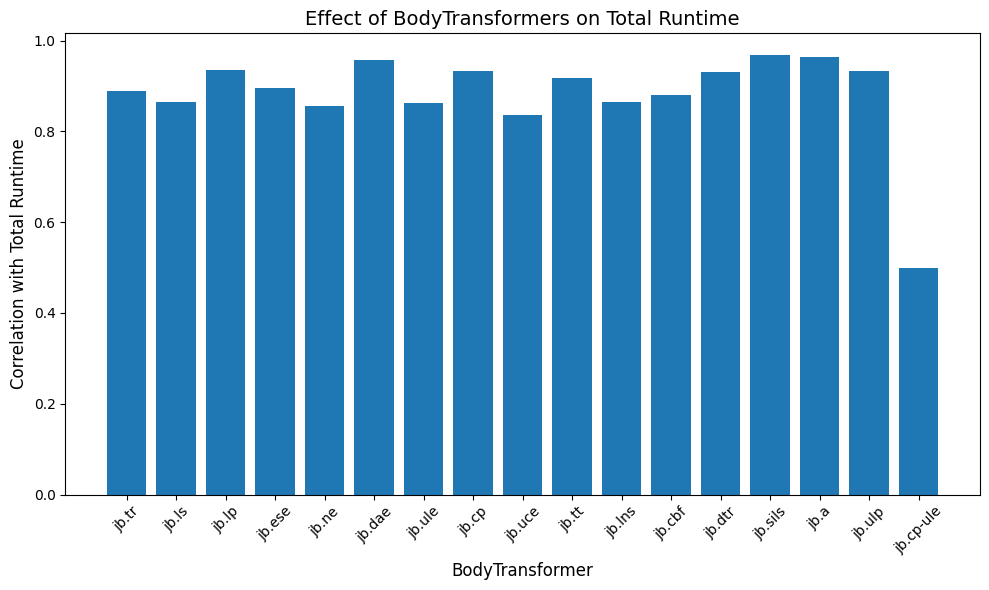

In [10]:
'''
To visualize the impact of each BodyTransformer on the total runtime, we can compute a metric that captures the effect of each BodyTransformer 
on the total time taken. For this analysis, we can use the correlation values between each BodyTransformer's time and the total runtime as a 
measure of effect. We will then create a bar plot with the BodyTransformers on the x-axis and their corresponding effect on the y-axis.
'''

'''- **Y-axis**: Correlation between each BodyTransformer's time and the `totalRuntime`. The correlation is a metric that indicates how much the time spent on a specific BodyTransformer is related to the total runtime.
  - Positive correlation means that as the time taken by a BodyTransformer increases, the total runtime tends to increase.
  - Negative correlation suggests the opposite.
 
This graph will help visualize which BodyTransformer has the most significant effect (either positively or negatively) on the total runtime.'''


# We already have the correlation matrix from previous steps
# Extract the correlation values between totalRuntime and each BodyTransformer
correlation_with_runtime = correlation_matrix['totalRuntime'].drop('totalRuntime')
 
# Plot the effect of each BodyTransformer on the totalRuntime
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_runtime.index, correlation_with_runtime.values)
plt.title('Effect of BodyTransformers on Total Runtime', fontsize=14)
plt.xlabel('BodyTransformer', fontsize=12)
plt.ylabel('Correlation with Total Runtime', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
 
# Show the plot
plt.show()


### Relationship between Each BodyTransformer and the totalRuntime using ANOVA

In [11]:
'''We will use **ANOVA** (since you have more than two BodyTransformers) to check if some of the BodyTransformers are making the total 
runtime significantly different.'''

'''### Explanation of the ANOVA Code:
1. We look at all the **BodyTransformers** (e.g., `jb.tr`, `jb.ls`) and grab the time taken for each.
2. We run an **ANOVA test** to check if there’s any significant difference between the transformers.
3. The output gives us an **F-statistic** and a **p-value**.
   - **F-statistic**: Tells us how big the difference is.
   - **p-value**: If this is less than 0.05, we say, "Yes! Some transformers really affect the total time!"
 
### What's Next:
- If the **p-value** is less than 0.05, we can conclude that **some BodyTransformers significantly affect the total runtime** more than others.
- If it's greater than 0.05, we would say the BodyTransformers are **not significantly different** from each other.'''

from scipy import stats
 
# Prepare the data for ANOVA test
# Extracting times for each BodyTransformer (e.g., jb.tr, jb.ls, etc.)
transformers = [col for col in df_1.columns if col != 'totalRuntime']
 
# Perform one-way ANOVA test
anova_result = stats.f_oneway(*[df_1[transformer].dropna() for transformer in transformers])
 
# Display the result
anova_result

# F_onewayResult(statistic=np.float64(14.524264603558748), pvalue=np.float64(1.1636712085756704e-38))

F_onewayResult(statistic=np.float64(14.524264603558748), pvalue=np.float64(1.1636712085756704e-38))

### Relationship between Each BodyTransformer and the totalRuntime using Regression analysis

In [5]:
'''
Regression analysis will help us understand how much each `BodyTransformer` affects the total runtime. Specifically, we'll perform a 
**multiple linear regression**, where the `totalRuntime` will be our dependent variable, and the times taken by each `BodyTransformer` 
will be the independent variables.

### Explanation of the Code:
 
1. **Independent Variables (X)**: These are the columns that represent the time taken by each `BodyTransformer`. We drop the `totalRuntime` column since it’s the dependent variable.
2. **Dependent Variable (y)**: This is the `totalRuntime` column, which we are trying to predict based on the time taken by each `BodyTransformer`.
3. **Add Constant**: This step adds an intercept (a baseline value) to the model.
4. **OLS (Ordinary Least Squares) Model**: We fit a linear regression model using the independent variables to predict `totalRuntime`.
5. **Model Summary**: The `summary()` function provides key outputs such as:
   - **Coefficients**: These tell us how much each `BodyTransformer` affects the total runtime.
   - **p-values**: If the p-value for a `BodyTransformer` is less than 0.05, it means that the time taken by that `BodyTransformer` significantly affects the total runtime.
   - **R-squared**: This tells us how well the independent variables explain the variation in `totalRuntime`. The closer this value is to 1, the better the model.
 
### Understanding the Results:
 
- **Coefficients**: These show how much the `totalRuntime` will change when the time for a specific `BodyTransformer` increases by one unit. A positive value means an increase in time increases the `totalRuntime`, while a negative value means it decreases the `totalRuntime`.
- **p-value**: If the p-value is small (typically less than 0.05), it means that the corresponding `BodyTransformer` has a significant effect on the total runtime.
- **R-squared**: This tells us how much of the variation in `totalRuntime` is explained by the time taken by the BodyTransformers. The closer this value is to 1, the better the fit.
 
### Next Steps:
Once you run this code, you’ll get insights into:
- Which BodyTransformers significantly affect the total runtime.
- How much each BodyTransformer impacts the total runtime.
'''
import pandas as pd
import statsmodels.api as sm
 
# Assuming df is already created as per the previous steps and each BodyTransformer has its column with time
# We will use the time for each transformer to predict totalRuntime
 
# Extract independent variables (BodyTransformers) and dependent variable (totalRuntime)
df_new = df_1.copy()
df_new.head()

X = df_new['BodyTransformersMetrics']
y = df_new['totalRuntime']
 
# Add a constant to the model (for the intercept)
X = sm.add_constant(X)
 
# Fit the regression model
model = sm.OLS(y, X).fit()
 
# Print out the regression results
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).